# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 

- The objective of this case study is to predict the employee salary based on the number of years of experience. 
- In simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable and Y is called the dependant variable.
- Why simple? Because it examines relationship between two variables only.
- Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
# install seaborn library
!pip install seaborn
!pip install --upgrade pip
# !pip install tensorflow



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns  # visualization
import matplotlib.pyplot as plt

In [ ]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [ ]:
salary_df

MINI CHALLENGE
 - Use head and tail methods to print the first and last 7 rows of the dataframe
 - Try to find the maximum salary value in the dataframe 

In [ ]:
head = salary_df.head(7)
tail = salary_df.tail(7)

In [ ]:
maximum = salary_df["Salary"].max()
maximum

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [ ]:
# check if there are any Null values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
# Check the dataframe info

salary_df.info()

In [ ]:
# Statistical summary of the dataframe
# data that can see the overview of the data frame
# std is the dispersion away from the mean 

salary_df.describe()

MINI CHALLENGE
 - What are the number of years of experience corresponding to employees with minimum and maximim salaries?

In [ ]:
max_years = salary_df[salary_df["Salary"] == salary_df["Salary"].max()]['YearsExperience'].iloc[0]
max_years

In [ ]:
min_years = salary_df[salary_df["Salary"] == salary_df["Salary"].min()]['YearsExperience'].iloc[0]
min_years

In [ ]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')  # .hist is histogram


In [ ]:
# plot pairplot

sns.pairplot(salary_df)  # useful as can see scatter plot with histogram

In [ ]:
corr_matrix = salary_df.corr()  # corr for correlation
sns.heatmap(corr_matrix, annot = True)  # annot = True simply show the actual value within the matrix, if False, we cant see on seaborn
plt.show()

MINI CHALLENGE
- Use regplot in Seaborn to obtain a straight line fit between "salary" and "years of experience"

In [ ]:
my_plot = sns.regplot(x = salary_df["YearsExperience"], y =  salary_df['Salary'], data = salary_df)

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [ ]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]

# Naming convention to have the input features to have uppercase!


In [ ]:
X

In [ ]:
y

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

# Convert all to be an array and change their data type to be float32 format.

In [ ]:
# Only take the numerical variables and scale them
X 

In [ ]:
# split the data into test and train sets and have blind tests which the machine learning algorithm requires to have less bias 
from sklearn.model_selection import train_test_split

# this method can shuffle the data, we dont want it to memorise the order of the data!, hence want to shuffle it

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
(X_train[0:3], X_test[0:3], y_train[0:3], y_test[0:3])


In [ ]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

MINI CHALLENGE
 - Try splitting the data into 75% for training and the rest for testing
 - Verify that the split was successful by obtaining the shape of both X_train and X_test
 - Did you notice any change in the order of the data? why?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# TASK #5: TRAIN A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [ ]:
# using linear regression model
from sklearn.linear_model import LinearRegression  # importing linearReg
from sklearn.metrics import mean_squared_error, accuracy_score  # want to get methods to get the stats

regresssion_model_sklearn = LinearRegression(fit_intercept = True)  # "fit_intercept = True" want to get the y-intercept, False will force the y-intercept to go to = 0 (not so good)
regresssion_model_sklearn.fit(X_train, y_train)  # need to input the 2 params here which is the training datas


In [ ]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

In [ ]:
print(f'Linear Model Coefficient (m): {regresssion_model_sklearn.coef_}')
print(f'Linear Model Coefficient (b): {regresssion_model_sklearn.intercept_}')

MINI CHALLENGE
- Retrain the model while setting the fit_intercept = False, what do you notice?

In [ ]:
regresssion_model_sklearn = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [ ]:
print(f'Linear Model Coefficient (m): {regresssion_model_sklearn.coef_}')
print(f'Linear Model Coefficient (b): {regresssion_model_sklearn.intercept_}')

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [ ]:
y_predict = regresssion_model_sklearn.predict(X_test)
# this will generate y-predict

In [ ]:
y_predict

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')  # scatter plot
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')  # want to plot the X_train with the predicted model 
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

MINI CHALLENGE
 - Use the trained model, obtain the salary corresponding to eployees who have years of experience = 5

In [ ]:
num_years = [[5]]

In [ ]:
salary = regresssion_model_sklearn.predict(num_years)
salary

# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [ ]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = "sage-maker-james-practical"  # Let's define the S3 bucket and prefix that we want to use in this session
prefix = "linear_learner"    # prefix is the subfolder within the bucket.


In [ ]:
# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

In [ ]:
X_train.shape

In [ ]:
y_train = y_train[:,0]

In [ ]:
y_train.shape

In [ ]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 
buf.seek(0) 


# All what we're doing right now is just trying to get the data to be in a format that is accepted by sagemaker  linear learner.


In [ ]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file, this will automatically create a folder
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = f's3://{bucket}/{prefix}/train/{key}'
print(f'uploaded training data location: {s3_train_data}')

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
# Make sure that the target label is a vector
y_test = y_test[:,0]


In [ ]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


In [ ]:
# Key refers to the name of the file    
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = f's3://{bucket}/{prefix}/test/{key}'
print(f'uploaded training data location: {s3_test_data}')

In [ ]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = f's3://{bucket}/{prefix}/output'
print(f'Training artifacts will be uploaded to: {output_location}')

In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image

# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

# linear-learner is the algorithm learner

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [ ]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',  # 
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,  # make 32 models for me and choose the best one
                           loss = 'absolute_loss')  # aboslute loss is the best for regression

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

MINI CHALLENGE
- Try to train the model with more epochs and additional number of models
- Can you try to reduce the cost of billable seconds?

In [ ]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',  # 
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       train_use_spot_instances = True,
                                       train_max_run = 300,
                                       train_max_wait = 600)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 10,
                           num_models = 36,  # make 32 models for me and choose the best one
                           loss = 'absolute_loss')  # aboslute loss is the best for regression

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [322]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

----!

In [323]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [324]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [325]:
result # results are in Json format

{'predictions': [{'score': 111189.984375},
  {'score': 85354.296875},
  {'score': 92243.8125},
  {'score': 104300.46875},
  {'score': 46600.76171875},
  {'score': 52629.08984375},
  {'score': 115495.9375},
  {'score': 59518.609375},
  {'score': 108606.421875}]}

In [326]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [327]:
predictions

array([111189.984375  ,  85354.296875  ,  92243.8125    , 104300.46875   ,
        46600.76171875,  52629.08984375, 115495.9375    ,  59518.609375  ,
       108606.421875  ])

In [328]:
predictions.shape

(9,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

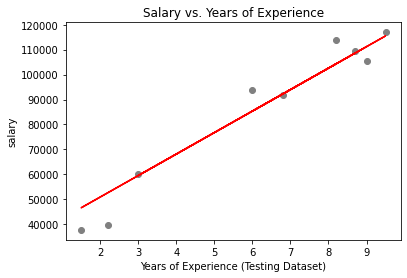

In [329]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [330]:
# Delete the end-point

linear_regressor.delete_endpoint()

# EXCELLENT JOB! NOW YOU'RE FAMILIAR WITH SAGEMAKER LINEAR LEARNER, YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS